# WUM - PD2

Krzysztof Wolny

In [1]:
# import packages
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

In [2]:
# read data
allegro = pd.read_csv('https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1')

In [3]:
allegro.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [4]:
allegro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

In [5]:
allegro.keys()

Index(['lp', 'date', 'item_id', 'categories', 'pay_option_on_delivery',
       'pay_option_transfer', 'seller', 'price', 'it_is_allegro_standard',
       'it_quantity', 'it_is_brand_zone', 'it_seller_rating', 'it_location',
       'main_category'],
      dtype='object')

## Kodowanie zmiennych kategorycznych

###  Target encoding dla zmiennej it_location

In [6]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
allegro['location_encoded'] = encoder.fit_transform(allegro['it_location'], allegro['price'])
allegro.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,location_encoded
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery,85.423398
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki",85.423398
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród,61.990914
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy,35.433365
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki",117.191956


 **Czy i jakie są przewagi target encoding nad one-hot?**  
 Target encoding jest metodą prostą i szybką, która nie tworzy dodatkowych kolumn. 

### Encoding dla main_category

**1. One-hot encoder**

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(allegro.main_category)

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(label.reshape(-1,1))

dfonehot = pd.DataFrame(onehot_encoded)
allegro_one_hot = pd.concat([allegro, dfonehot], axis =1)
allegro_one_hot.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,17,18,19,20,21,22,23,24,25,26
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
allegro_one_hot.keys()

Index([                    'lp',                   'date',
                      'item_id',             'categories',
       'pay_option_on_delivery',    'pay_option_transfer',
                       'seller',                  'price',
       'it_is_allegro_standard',            'it_quantity',
             'it_is_brand_zone',       'it_seller_rating',
                  'it_location',          'main_category',
             'location_encoded',                        0,
                              1,                        2,
                              3,                        4,
                              5,                        6,
                              7,                        8,
                              9,                       10,
                             11,                       12,
                             13,                       14,
                             15,                       16,
                             17,                       1

**Opis one-hot encoder**  
Stworzyliśmy 27 nowych kolumn. Każda kolumna odpowiada jednej wartości, która znajdowała się w kolumnie 'main_category'. W nowych kolumnach mamy wartości równe tylko 0 i 1. 1 oznacza, że dana wartość znajduje się się w danej kolumnie, a 0 przeciwnie. 

**2. Ordinal encoder**

In [9]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

allegro_ordinal = allegro.copy()
allegro_ordinal['main_ordinal_encoder'] = oe.fit_transform(allegro['main_category'].values.reshape(-1,1))
allegro_ordinal.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,location_encoded,main_ordinal_encoder
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery,85.423398,12.0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki",85.423398,18.0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród,61.990914,6.0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy,35.433365,14.0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki",117.191956,18.0


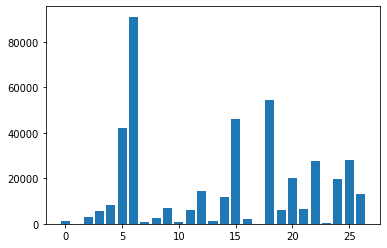

In [10]:
# narysujmy barplot
x = allegro_ordinal.groupby('main_ordinal_encoder').size()
plt.bar(x.keys(), x)
plt.show()

**Opis ordinal encoder**  
Dla każdego wyniku w kolumnie 'main_category' przypisaliśmy jedną liczbę. Wyszło, że jest 27 unikalnych wyników w 'main_category' i każdy wynik dostał oddzielną liczbę od 0 do 26. 

**3. Binary encoder**

In [11]:
import category_encoders as ce

encoder = ce.BinaryEncoder(return_df=True)

allegro_binary=encoder.fit_transform(allegro['main_category']) 
allegro_binary = pd.concat([allegro, allegro_binary], axis =1)
allegro_binary.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,it_seller_rating,it_location,main_category,location_encoded,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,50177,Warszawa,Komputery,85.423398,0,0,0,0,0,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,12428,Warszawa,"Odzież, Obuwie, Dodatki",85.423398,0,0,0,0,1,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,7389,Leszno,Dom i Ogród,61.990914,0,0,0,0,1,1
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,15006,Wola Krzysztoporska,Książki i Komiksy,35.433365,0,0,0,1,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki",117.191956,0,0,0,0,1,0


**Opis binary encoder**  
Binary encoder działa bardzo podobnie jak one-hot encoder. Różnica polega na tym, że każda unikalna wartość jest przedstawiana jako liczba binarna i następnie rozdzielana na kolejne liczby i w ten sposób zapisywana do kolumn. Dzięki temu mamy mniej tworzonych kolumn. 

## Uzupełnianie braków

In [17]:
# ograniczenie danych do price, it_seller_rating i it_quantity
import math
n = 0.05 # jak dużo wierszy wziąć 

numerical_allegro  = allegro[['price', 'it_seller_rating', 'it_quantity']]
numerical_allegro = numerical_allegro.head(math.floor(len(numerical_allegro)*n))

Będę korzystać z Nearest neighbors imputation

In [18]:
import random
from sklearn.impute import KNNImputer

def fil_tester(dataframe, column_names):
    df = dataframe.copy(deep=True)
    randoms = []
    for column in column_names:
        randomlist = random.sample(range(0, len(df)), math.floor(0.1*len(df)))
        randoms.append(randomlist)
        df.loc[randomlist, column] = np.nan

    imputer = KNNImputer(n_neighbors=3,weights = 'uniform')
    df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

    return df, randoms

### Test1: it_seller_rating

In [22]:
# wykonaj test 10 razy
rmse_list = []
for i in range(10):
    df, randoms = fil_tester(numerical_allegro, ['it_seller_rating'])
    rmse = np.sqrt(mean_squared_error(df.loc[randoms[0], 'it_seller_rating'].values, numerical_allegro.loc[randoms[0], 'it_seller_rating'].values))
    rmse_list.append(rmse)
    print(f'RMSE{i}: {rmse:.3f}')
# odchylenie standardowe: 
print(f'Odchylenie standardowe: {np.std(rmse_list)}')

RMSE0: 34269.990
RMSE1: 32400.565
RMSE2: 35745.562
RMSE3: 37173.159
RMSE4: 33069.091
RMSE5: 34947.212
RMSE6: 37168.258
RMSE7: 35361.044
RMSE8: 32864.669
RMSE9: 34708.740
Odchylenie standardowe: 1589.0445718091635


### Test2: it_seller_rating i it_quantity

In [23]:
# wykonaj test 10 razy
rmse_seller_list = []
rmse_quantity_list = []

for i in range(10):
    df, randoms = fil_tester(numerical_allegro, ['it_seller_rating', 'it_quantity'])
    
    rmse_seller = np.sqrt(mean_squared_error(df.loc[randoms[0], 'it_seller_rating'].values, numerical_allegro.loc[randoms[0], 'it_seller_rating'].values))
    rmse_quantity = np.sqrt(mean_squared_error(df.loc[randoms[1], 'it_quantity'].values, numerical_allegro.loc[randoms[1], 'it_quantity'].values))
    
    rmse_seller_list.append(rmse_seller)
    rmse_quantity_list.append(rmse_quantity)

    print(f'RMSE{i} it_seller_rating: {rmse_seller:.3f}')
    print(f'RMSE{i} it_quantity: {rmse_quantity:.3f}')

# odchylenie standardowe: 
print(f'\nOdchylenie standardowe it_seller_rating: {np.std(rmse_seller_list)}')
print(f'Odchylenie standardowe it_quantity: {np.std(rmse_quantity_list)}')

RMSE0 it_seller_rating: 39695.410
RMSE0 it_quantity: 23544.416
RMSE1 it_seller_rating: 37698.659
RMSE1 it_quantity: 23952.512
RMSE2 it_seller_rating: 40160.750
RMSE2 it_quantity: 24885.712
RMSE3 it_seller_rating: 34756.167
RMSE3 it_quantity: 25432.232
RMSE4 it_seller_rating: 38522.768
RMSE4 it_quantity: 25260.176
RMSE5 it_seller_rating: 37870.674
RMSE5 it_quantity: 24235.002
RMSE6 it_seller_rating: 38006.723
RMSE6 it_quantity: 25540.945
RMSE7 it_seller_rating: 34970.673
RMSE7 it_quantity: 23687.492
RMSE8 it_seller_rating: 38626.736
RMSE8 it_quantity: 25643.930
RMSE9 it_seller_rating: 36379.737
RMSE9 it_quantity: 25181.764

Odchylenie standardowe it_seller_rating: 1718.8574512694413
Odchylenie standardowe it_quantity: 764.0016072456224


### Wnioski

W teście 1 średnie wyniki RMSE są mniejsze niż w teście 2, co widać na wykresie. Również odchylenie standarowe tych wyników jest mniejsze. Jest to spodziewane ze względu na to, że w pierwszym przypadku było więcej danych, na których komputer mógł pracować. 

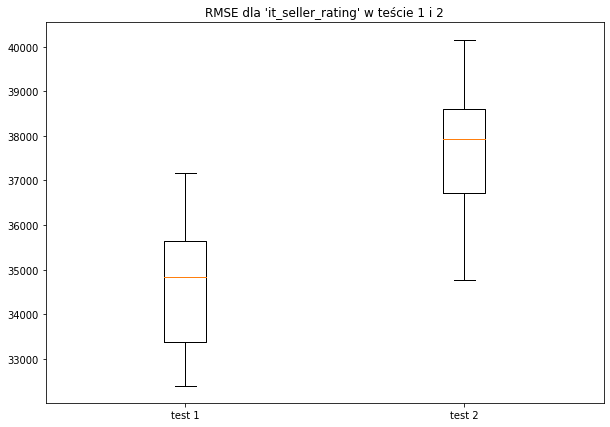

In [24]:
# porównanie rmse 'it_seller_rating' w obu testach przy pomocy boxplotu
data = [rmse_list, rmse_seller_list]

plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.title("RMSE dla 'it_seller_rating' w teście 1 i 2")
plt.xticks([1, 2], ['test 1', 'test 2'])
plt.show()